<a href="https://colab.research.google.com/github/Sreyas2403/StockAnalysis_Patterns-Indicators/blob/main/Bullish%26BearishPatterns_MultipleStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepython


In [ ]:
from nsepython import *
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
symbol = input("Enter the symbol: ")
series = "EQ"
start_date = input("Enter the start date (dd-mm-yyyy): ")
end_date = input("Enter the end date (dd-mm-yyyy): ")
equity_data = equity_history(symbol, series, start_date, end_date)
print(equity_data)

Enter the symbol: sbin
Enter the start date (dd-mm-yyyy): 01-01-2022
Enter the end date (dd-mm-yyyy): 31-12-2023
                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    65857a7e8556570bd29b31d2      SBIN        EQ              N   
1    658ac07e2afa40971bcfcd87      SBIN        EQ              N   
2    658c11def964ff32e77dc404      SBIN        EQ              N   
3    658d635bfc7c264717dac3d9      SBIN        EQ              N   
4    658eb4febc28d99b03074c99      SBIN        EQ              N   
..                        ...       ...       ...            ...   
503  63ce8952c7307c0007d9feee      SBIN        EQ              N   
504  63ce8961ea62a9000775ff8e      SBIN        EQ              N   
505  63ce8971a34e360007d0d5fc      SBIN        EQ              N   
506  63ce897ff1500d00079a11a1      SBIN        EQ              N   
507  63ce898eeb800e00070240e5      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0   

In [ ]:
#BUllish Engulfing
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    stock_df = pd.DataFrame(equity_data)
    stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
    stock_df = stock_df.sort_values(by='mTIMESTAMP')
    stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
    stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')
    stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])
    return stock_df

def identify_bullish_engulfing(stock_df):
    bullish_engulfing_dates = []
    for i in range(2, len(stock_df) - 1):
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] < stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] < stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):
            if (stock_df['CH_OPENING_PRICE'].iloc[i + 1] <= stock_df['CH_CLOSING_PRICE'].iloc[i] and
                stock_df['CH_CLOSING_PRICE'].iloc[i + 1] >= stock_df['CH_OPENING_PRICE'].iloc[i]):
                bullish_engulfing_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bullish_engulfing_dates

def plot_bullish_engulfing(stock_df, symbol, bullish_engulfing_dates, pdf):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
    ax.set_ylabel('Closing Price')
    ax.set_title(f'Bullish Engulfing Patterns in {symbol}')
    ax.grid()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()
    for date in bullish_engulfing_dates:
        ax.axvline(date, color='green', linestyle='--', lw=2, alpha=0.7, label='Bullish Engulfing' if date == bullish_engulfing_dates[0] else "")
    ax.legend(loc='upper left')
    plt.tight_layout()
    pdf.savefig(fig)
    plt.close()

def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()
    series = "EQ"
    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bullish_Engulfing_Patterns.pdf"
    pdf = PdfPages(pdf_filename)
    results = []

    for symbol in stock_symbols:
        try:
            stock_df = fetch_equity_data(symbol, series, start_date, end_date)
            bullish_engulfing_dates = identify_bullish_engulfing(stock_df)
            for date in bullish_engulfing_dates:
                results.append({'Stock Symbol': symbol, 'Bullish Engulfing Date': date})
            print(f"Bullish Engulfing Pattern Dates for {symbol}:")
            for date in bullish_engulfing_dates:
                print(f"{symbol}: {date}")
            plot_bullish_engulfing(stock_df, symbol, bullish_engulfing_dates, pdf)
        except Exception as e:
            print(f"Error processing symbol {symbol}: {e}")

    pdf.close()
    results_df = pd.DataFrame(results)
    results_df.to_excel("Bullish_Engulfing_Patterns_Dates.xlsx", index=False)
    print(f"Results saved to Bullish_Engulfing_Patterns_Dates.xlsx and {pdf_filename}")

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
Bullish Engulfing Pattern Dates for SBIN:
SBIN: 2022-01-25 00:00:00
SBIN: 2022-04-01 00:00:00
SBIN: 2022-08-23 00:00:00
SBIN: 2023-05-04 00:00:00
SBIN: 2023-09-07 00:00:00
Bullish Engulfing Pattern Dates for THOMASCOOK:
THOMASCOOK: 2022-01-21 00:00:00
THOMASCOOK: 2022-01-27 00:00:00
THOMASCOOK: 2022-05-13 00:00:00
THOMASCOOK: 2022-07-01 00:00:00
THOMASCOOK: 2023-01-31 00:00:00
THOMASCOOK: 2023-02-08 00:00:00
THOMASCOOK: 2023-03-29 00:00:00
THOMASCOOK: 2023-05-24 00:00:00
Bullish Engulfing Pattern Dates for ADANIPOWER:
ADANIPOWER: 2022-04-11 00:00:00
ADANIPOWER: 2022-04-18 00:00:00
ADANIPOWER: 2022-05-02 00:00:00
ADANIPOWER: 2023-02-08 00:00:00
ADANIPOWER: 2023-02-28 00:00:00
ADANIPOWER: 2023-03-16 00:00:00
ADANIPOWER: 2023-03-29 00:00:00
ADANIPOWER: 2023-05-19 00:00:00
ADANIPOWER: 2023-07-25 00:00:00
ADANIPOWER: 2023-09-01 00:00:00
ADANIPO

In [ ]:
#Bearish Engulfing
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify bearish engulfing patterns
def identify_bearish_engulfing(stock_df):
    bearish_engulfing_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for an uptrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] > stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] > stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for bearish engulfing pattern
            if (stock_df['CH_OPENING_PRICE'].iloc[i + 1] >= stock_df['CH_CLOSING_PRICE'].iloc[i] and
                stock_df['CH_CLOSING_PRICE'].iloc[i + 1] <= stock_df['CH_OPENING_PRICE'].iloc[i]):
                bearish_engulfing_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bearish_engulfing_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bearish_Engulfing_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Bearish_Engulfing_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])

                # Identify bearish engulfing patterns
                bearish_engulfing_dates = identify_bearish_engulfing(stock_df)

                if bearish_engulfing_dates:
                    # Print identified bearish engulfing pattern dates
                    print(f"Bearish Engulfing Pattern Dates for {symbol}:")
                    for date in bearish_engulfing_dates:
                        print(date)

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Bearish Engulfing Dates': pd.Series(bearish_engulfing_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(15, 8))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Bearish Engulfing Patterns in {symbol}')
                    ax.grid()
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight bearish engulfing pattern dates
                    for date in bearish_engulfing_dates:
                        ax.axvline(date, color='red', linestyle='--', lw=2, alpha=0.7, label='Bearish Engulfing' if date == bearish_engulfing_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No bearish engulfing patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Bearish Engulfing Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Bearish_Engulfing_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE':

In [ ]:
#Bullish Thrusting
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify bullish thrusting patterns
def identify_bullish_thrusting(stock_df):
    bullish_thrusting_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for a downtrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] < stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] < stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Bullish Thrusting pattern
            close_price_d = stock_df['CH_CLOSING_PRICE'].iloc[i]
            open_price_d = stock_df['CH_OPENING_PRICE'].iloc[i]
            open_price_d1 = stock_df['CH_OPENING_PRICE'].iloc[i + 1]
            close_price_d1 = stock_df['CH_CLOSING_PRICE'].iloc[i + 1]

            if (open_price_d1 > close_price_d and
                close_price_d1 > open_price_d and
                close_price_d + 0.5 * abs(close_price_d - open_price_d) > open_price_d1):
                bullish_thrusting_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bullish_thrusting_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bullish_Thrusting_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Bullish_Thrusting_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])

                # Identify bullish thrusting patterns
                bullish_thrusting_dates = identify_bullish_thrusting(stock_df)

                if bullish_thrusting_dates:
                    # Print identified bullish thrusting pattern dates
                    print(f"Bullish Thrusting Pattern Dates for {symbol}:")
                    for date in bullish_thrusting_dates:
                        print(date)

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Bullish Thrusting Dates': pd.Series(bullish_thrusting_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Bullish Thrusting Patterns in {symbol}')
                    ax.grid()
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight bullish thrusting pattern dates
                    for date in bullish_thrusting_dates:
                        ax.axvline(date, color='green', linestyle='--', lw=2, alpha=0.7, label='Bullish Thrusting' if date == bullish_thrusting_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No bullish thrusting patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Bullish Thrusting Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Bullish_Thrusting_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE':

In [ ]:
# 4. Bearish Thrusting
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify bearish thrusting patterns
def identify_bearish_thrusting(stock_df):
    bearish_thrusting_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for an uptrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] > stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] > stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Bearish Thrusting pattern
            close_price_d = stock_df['CH_CLOSING_PRICE'].iloc[i]
            open_price_d = stock_df['CH_OPENING_PRICE'].iloc[i]
            open_price_d1 = stock_df['CH_OPENING_PRICE'].iloc[i + 1]
            close_price_d1 = stock_df['CH_CLOSING_PRICE'].iloc[i + 1]

            if (open_price_d1 < close_price_d and
                close_price_d1 < open_price_d and
                open_price_d + 0.5 * abs(close_price_d - open_price_d) < open_price_d1):
                bearish_thrusting_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bearish_thrusting_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bearish_Thrusting_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Bearish_Thrusting_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])

                # Identify bearish thrusting patterns
                bearish_thrusting_dates = identify_bearish_thrusting(stock_df)

                if bearish_thrusting_dates:
                    # Print identified bearish thrusting pattern dates
                    print(f"Bearish Thrusting Pattern Dates for {symbol}:")
                    for date in bearish_thrusting_dates:
                        print(f"{symbol}: {date}")

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Bearish Thrusting Dates': pd.Series(bearish_thrusting_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Bearish Thrusting Patterns in {symbol}')
                    ax.grid()
                    # Formatting the dates
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight Bearish Thrusting pattern dates
                    for date in bearish_thrusting_dates:
                        ax.axvline(date, color='red', linestyle='--', lw=2, alpha=0.7, label='Bearish Thrusting' if date == bearish_thrusting_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No bearish thrusting patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Bearish Thrusting Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Bearish_Thrusting_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
Bearish Thrusting Pattern Dates for SBIN:
SBIN: 2022-05-31 00:00:00
SBIN: 2022-08-19 00:00:00
SBIN: 2023-03-09 00:00:00
Bearish Thrusting Pattern Dates for THOMASCOOK:
THOMASCOOK: 2022-02-21 00:00:00
THOMASCOOK: 2022-08-10 00:00:00
Bearish Thrusting Pattern Dates for ADANIPOWER:
ADANIPOWER: 2023-10-03 00:00:00
ADANIPOWER: 2023-11-07 00:00:00
Results saved to Bearish_Thrusting_Patterns_Dates.xlsx and Bearish_Thrusting_Patterns.pdf


In [ ]:
#5. Bullish piercing
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify bullish piercing patterns
def identify_bullish_piercing(stock_df):
    bullish_piercing_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for a downtrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] < stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] < stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Bullish Piercing pattern
            close_price_d = stock_df['CH_CLOSING_PRICE'].iloc[i]
            open_price_d = stock_df['CH_OPENING_PRICE'].iloc[i]
            open_price_d1 = stock_df['CH_OPENING_PRICE'].iloc[i + 1]
            close_price_d1 = stock_df['CH_CLOSING_PRICE'].iloc[i + 1]

            if (open_price_d1 < close_price_d and
                close_price_d1 < open_price_d and
                close_price_d + 0.5 * abs(close_price_d - open_price_d) < close_price_d1):
                bullish_piercing_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bullish_piercing_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bullish_Piercing_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Bullish_Piercing_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])

                # Identify bullish piercing patterns
                bullish_piercing_dates = identify_bullish_piercing(stock_df)

                if bullish_piercing_dates:
                    # Print identified bullish piercing pattern dates
                    print(f"Bullish Piercing Pattern Dates for {symbol}:")
                    for date in bullish_piercing_dates:
                        print(f"{symbol}: {date}")

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Bullish Piercing Dates': pd.Series(bullish_piercing_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Bullish Piercing Patterns in {symbol}')
                    ax.grid()
                    # Formatting the dates
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight Bullish Piercing pattern dates
                    for date in bullish_piercing_dates:
                        ax.axvline(date, color='green', linestyle='--', lw=2, alpha=0.7, label='Bullish Piercing' if date == bullish_piercing_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No bullish piercing patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Bullish Piercing Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Bullish_Piercing_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE':

Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE':

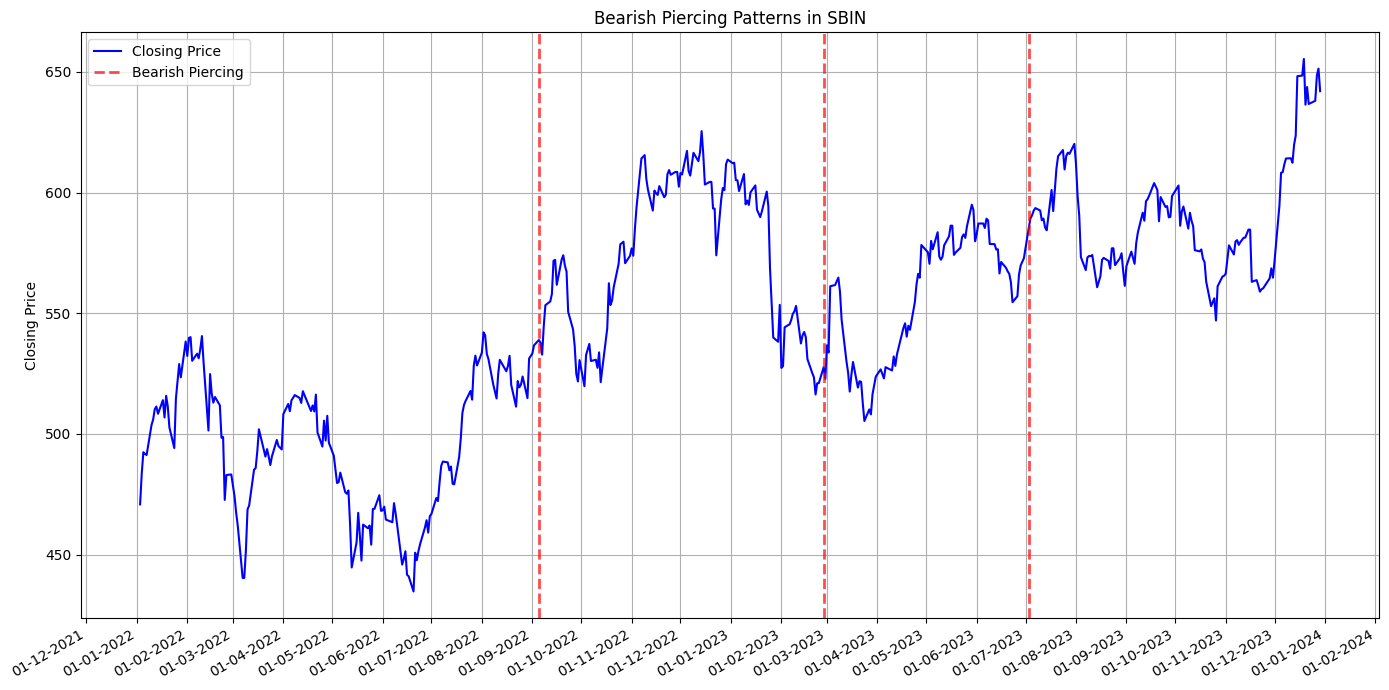

{'data': [{'_id': '63ce898eeb800e0007023eeb', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 64.7, 'CH_TRADE_LOW_PRICE': 63.15, 'CH_OPENING_PRICE': 64.25, 'CH_CLOSING_PRICE': 63.45, 'CH_LAST_TRADED_PRICE': 63.45, 'CH_PREVIOUS_CLS_PRICE': 63.9, 'CH_TOT_TRADED_QTY': 290726, 'CH_TOT_TRADED_VAL': 18574991.8, 'CH_52WEEK_HIGH_PRICE': 85.5, 'CH_52WEEK_LOW_PRICE': 41.75, 'CH_TOTAL_TRADES': 2568, 'CH_ISIN': 'INE332A01027', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.396Z', 'updatedAt': '2023-01-23T13:20:14.396Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 63.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a0f92', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 65.3, 'CH_TRADE_LOW_PRICE': 63.45, 'CH_OPENING_PRICE': 64.1, 'CH_CLOSING_PRICE': 63.9, 'CH_LAST_TRADED_PRICE': 63.65, 'CH_PREVIOUS_CLS_PRICE': 63.7, 'CH_TOT_TRADED_QTY': 331903, 

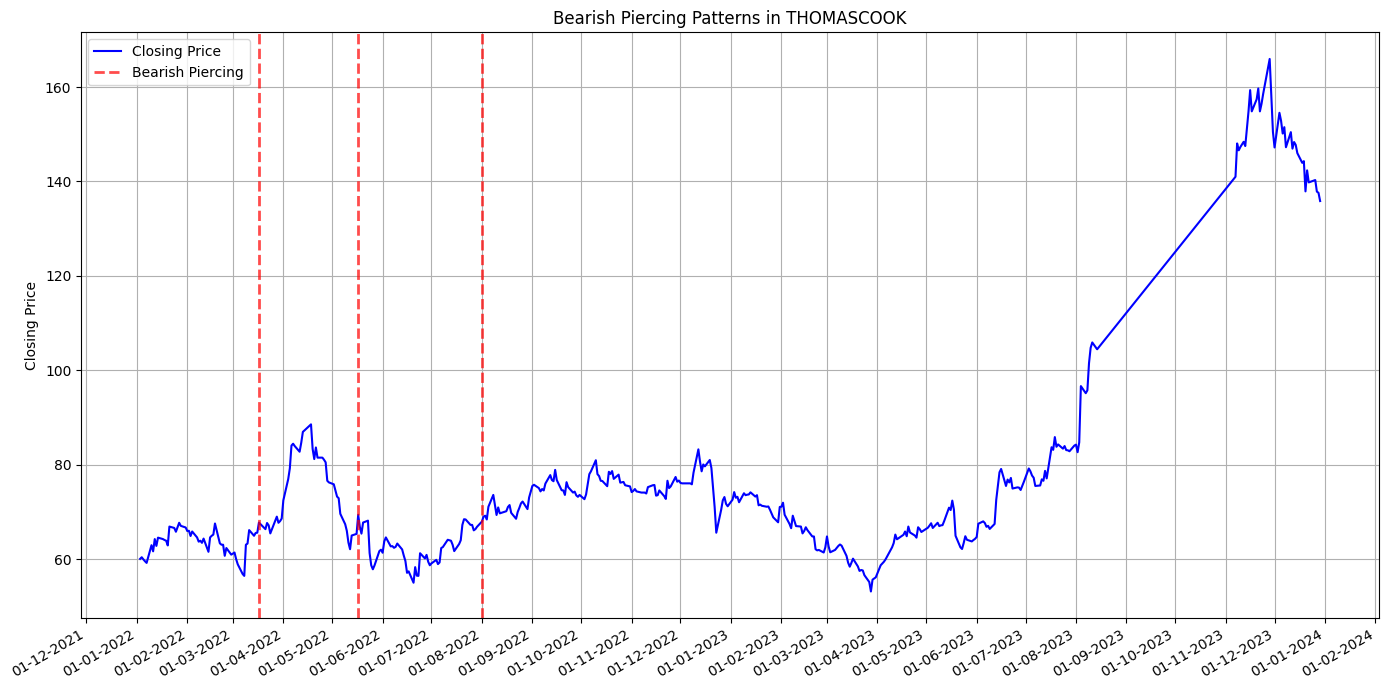

{'data': [{'_id': '63ce898feb800e00070245d3', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 129.1, 'CH_TRADE_LOW_PRICE': 106.1, 'CH_OPENING_PRICE': 108.15, 'CH_CLOSING_PRICE': 122.75, 'CH_LAST_TRADED_PRICE': 122.9, 'CH_PREVIOUS_CLS_PRICE': 107.6, 'CH_TOT_TRADED_QTY': 118621529, 'CH_TOT_TRADED_VAL': 14576896875.85, 'CH_52WEEK_HIGH_PRICE': 166.9, 'CH_52WEEK_LOW_PRICE': 52, 'CH_TOTAL_TRADES': 454648, 'CH_ISIN': 'INE814H01011', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:15.905Z', 'updatedAt': '2023-01-23T13:20:15.905Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 122.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce8980f1500d00079a16b8', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 109.85, 'CH_TRADE_LOW_PRICE': 106.5, 'CH_OPENING_PRICE': 109.2, 'CH_CLOSING_PRICE': 107.6, 'CH_LAST_TRADED_PRICE': 107.5, 'CH_PREVIOUS_CLS_PRICE': 108.15, 'CH_TOT_TRA

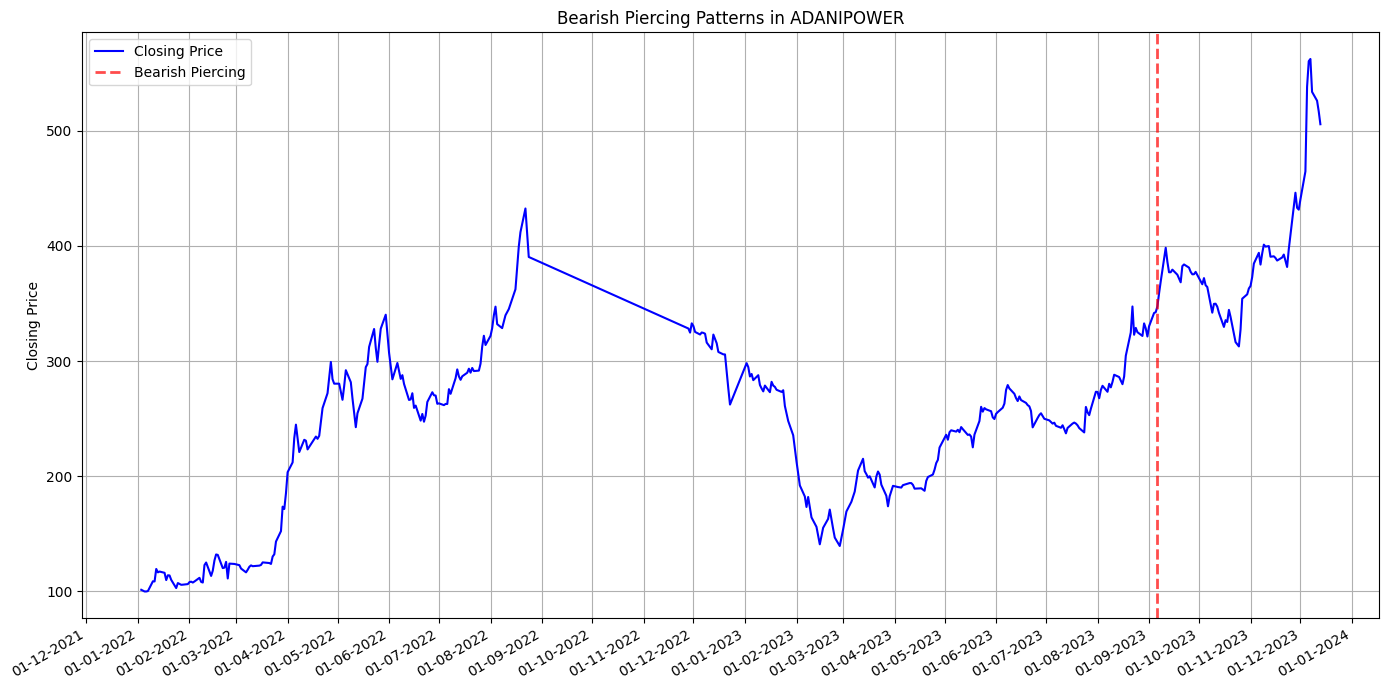

Results saved to Bearish_Piercing_Patterns_Dates.xlsx and Bearish_Piercing_Patterns.pdf


In [ ]:
#6. Bearish Piercing
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify bearish piercing patterns
def identify_bearish_piercing(stock_df):
    bearish_piercing_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for an uptrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] > stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] > stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Bearish Piercing pattern
            close_price_d = stock_df['CH_CLOSING_PRICE'].iloc[i]
            open_price_d = stock_df['CH_OPENING_PRICE'].iloc[i]
            open_price_d1 = stock_df['CH_OPENING_PRICE'].iloc[i + 1]
            close_price_d1 = stock_df['CH_CLOSING_PRICE'].iloc[i + 1]

            if (open_price_d1 > close_price_d and
                close_price_d1 > open_price_d and
                open_price_d + 0.5 * abs(close_price_d - open_price_d) > open_price_d1):
                bearish_piercing_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return bearish_piercing_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Bearish_Piercing_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Bearish_Piercing_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_OPENING_PRICE'])

                # Identify bearish piercing patterns
                bearish_piercing_dates = identify_bearish_piercing(stock_df)

                if bearish_piercing_dates:
                    # Print identified bearish piercing pattern dates
                    print(f"Bearish Piercing Pattern Dates for {symbol}:")
                    for date in bearish_piercing_dates:
                        print(f"{symbol}: {date}")

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Bearish Piercing Dates': pd.Series(bearish_piercing_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Bearish Piercing Patterns in {symbol}')
                    ax.grid()
                    # Formatting the dates
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight Bearish Piercing pattern dates
                    for date in bearish_piercing_dates:
                        ax.axvline(date, color='red', linestyle='--', lw=2, alpha=0.7, label='Bearish Piercing' if date == bearish_piercing_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    plt.show()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No bearish piercing patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Bearish Piercing Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Bearish_Piercing_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
Tweezer Bottom Pattern Dates for SBIN:
SBIN: 2022-06-10 00:00:00
SBIN: 2022-11-17 00:00:00
SBIN: 2023-01-19 00:00:00
SBIN: 2023-09-07 00:00:00


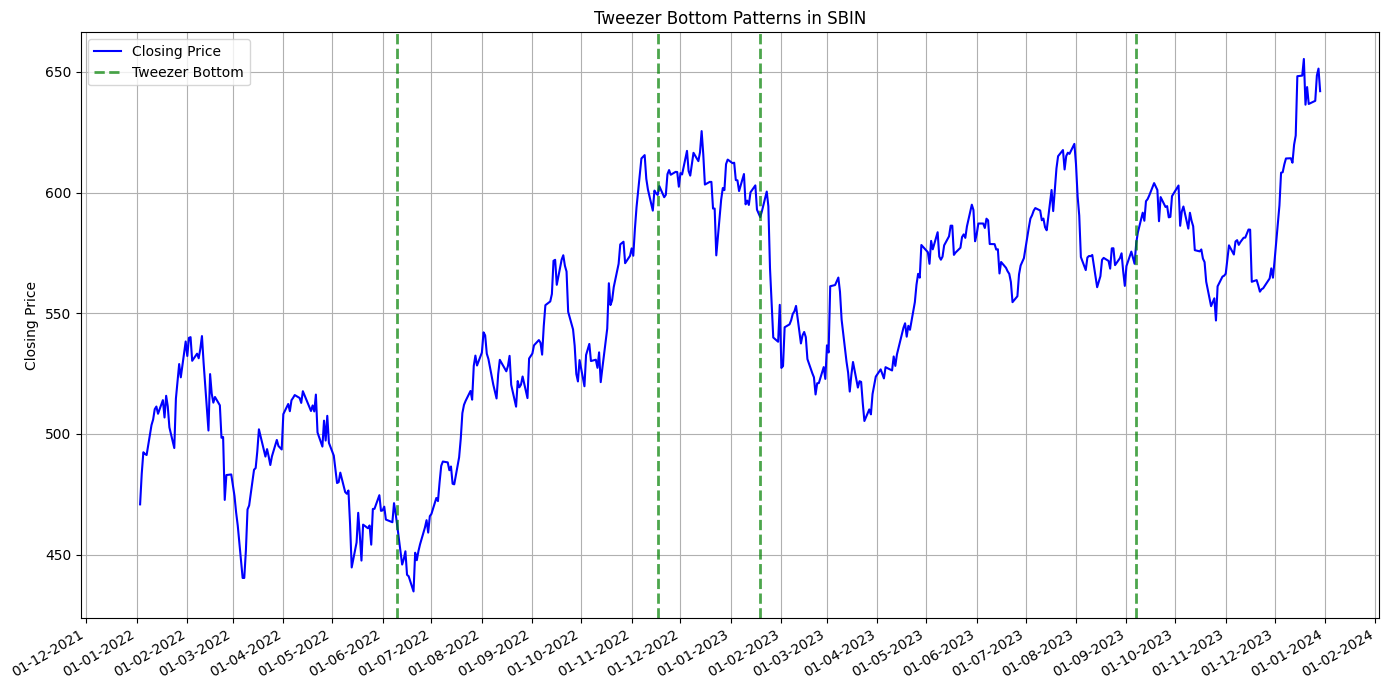

Tweezer Bottom Pattern Dates for THOMASCOOK:
THOMASCOOK: 2022-02-01 00:00:00
THOMASCOOK: 2022-05-05 00:00:00
THOMASCOOK: 2022-09-22 00:00:00
THOMASCOOK: 2022-09-27 00:00:00
THOMASCOOK: 2022-11-09 00:00:00
THOMASCOOK: 2022-11-23 00:00:00
THOMASCOOK: 2023-01-02 00:00:00
THOMASCOOK: 2023-03-06 00:00:00
THOMASCOOK: 2023-05-30 00:00:00
THOMASCOOK: 2023-06-08 00:00:00


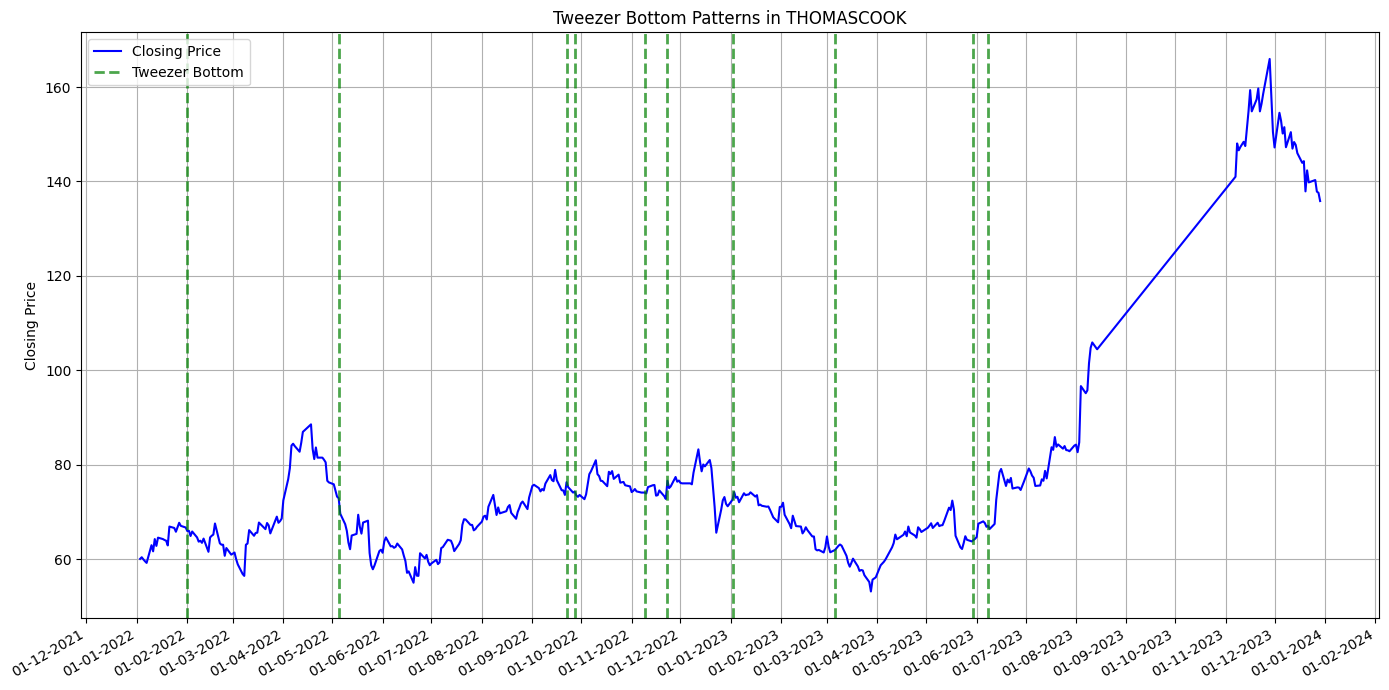

{'data': [{'_id': '63ce8b19262b0c000763cade', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 124.75, 'CH_TRADE_LOW_PRICE': 122.3, 'CH_OPENING_PRICE': 124.5, 'CH_CLOSING_PRICE': 123.75, 'CH_LAST_TRADED_PRICE': 123.65, 'CH_PREVIOUS_CLS_PRICE': 124.55, 'CH_TOT_TRADED_QTY': 11802958, 'CH_TOT_TRADED_VAL': 1455978498.1, 'CH_52WEEK_HIGH_PRICE': 166.9, 'CH_52WEEK_LOW_PRICE': 81.35, 'CH_TOTAL_TRADES': 45126, 'CH_ISIN': 'INE814H01011', 'CH_TIMESTAMP': '2022-03-22', 'TIMESTAMP': '2022-03-21T18:30:00.000Z', 'createdAt': '2023-01-23T13:26:49.127Z', 'updatedAt': '2023-01-23T13:26:49.127Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 123.36, 'mTIMESTAMP': '22-Mar-2022'}, {'_id': '63ce8b09ed0f3900079bb070', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 126.9, 'CH_TRADE_LOW_PRICE': 124.1, 'CH_OPENING_PRICE': 125.85, 'CH_CLOSING_PRICE': 124.55, 'CH_LAST_TRADED_PRICE': 124.25, 'CH_PREVIOUS_CLS_PRICE': 125.1, 'CH_TOT_T

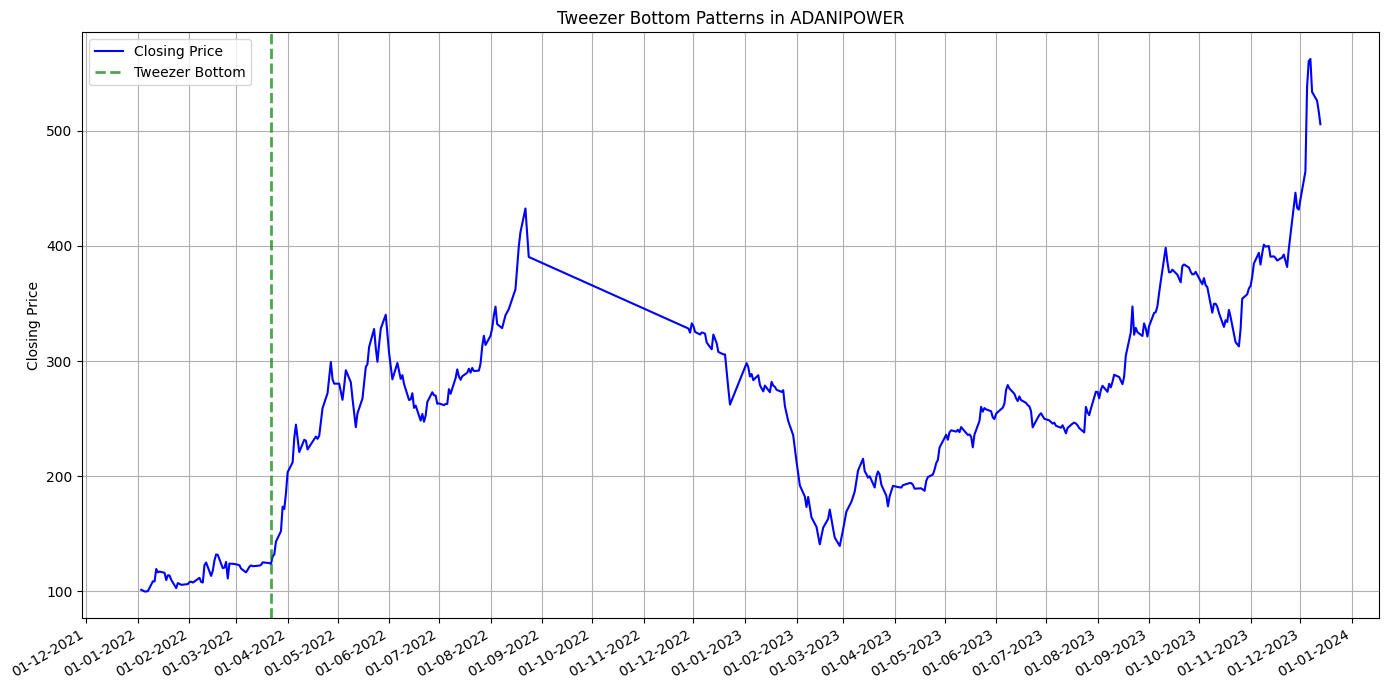

Results saved to Tweezer_Bottom_Patterns_Dates.xlsx and Tweezer_Bottom_Patterns.pdf


In [ ]:
#7. Tweezer Bottom
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify tweezer bottom patterns
def identify_tweezer_bottom(stock_df):
    tweezer_bottom_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for a downtrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] < stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] < stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Tweezer Bottom pattern
            low_price_d = stock_df['CH_TRADE_LOW_PRICE'].iloc[i]
            low_price_d1 = stock_df['CH_TRADE_LOW_PRICE'].iloc[i + 1]

            if abs(low_price_d1 - low_price_d) <= 0.1:
                tweezer_bottom_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return tweezer_bottom_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Tweezer_Bottom_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Tweezer_Bottom_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_TRADE_LOW_PRICE'] = pd.to_numeric(stock_df['CH_TRADE_LOW_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_TRADE_LOW_PRICE'])

                # Identify tweezer bottom patterns
                tweezer_bottom_dates = identify_tweezer_bottom(stock_df)

                if tweezer_bottom_dates:
                    # Print identified tweezer bottom pattern dates
                    print(f"Tweezer Bottom Pattern Dates for {symbol}:")
                    for date in tweezer_bottom_dates:
                        print(f"{symbol}: {date}")

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Tweezer Bottom Dates': pd.Series(tweezer_bottom_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Tweezer Bottom Patterns in {symbol}')
                    ax.grid()
                    # Formatting the dates
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight Tweezer Bottom pattern dates
                    for date in tweezer_bottom_dates:
                        ax.axvline(date, color='green', linestyle='--', lw=2, alpha=0.7, label='Tweezer Bottom' if date == tweezer_bottom_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    plt.show()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No tweezer bottom patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Tweezer Bottom Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Tweezer_Bottom_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date (dd-mm-yyyy): 01-01-2022
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce898eeb800e00070240e5', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 543.95, 'CH_TRADE_LOW_PRICE': 534.4, 'CH_OPENING_PRICE': 537.1, 'CH_CLOSING_PRICE': 540.55, 'CH_LAST_TRADED_PRICE': 540.3, 'CH_PREVIOUS_CLS_PRICE': 535.25, 'CH_TOT_TRADED_QTY': 18659370, 'CH_TOT_TRADED_VAL': 10082567002.45, 'CH_52WEEK_HIGH_PRICE': 549, 'CH_52WEEK_LOW_PRICE': 321.3, 'CH_TOTAL_TRADES': 228387, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.859Z', 'updatedAt': '2023-01-23T13:20:14.859Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 540.35, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a11a1', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 536.5, 'CH_TRADE_LOW_PRICE':

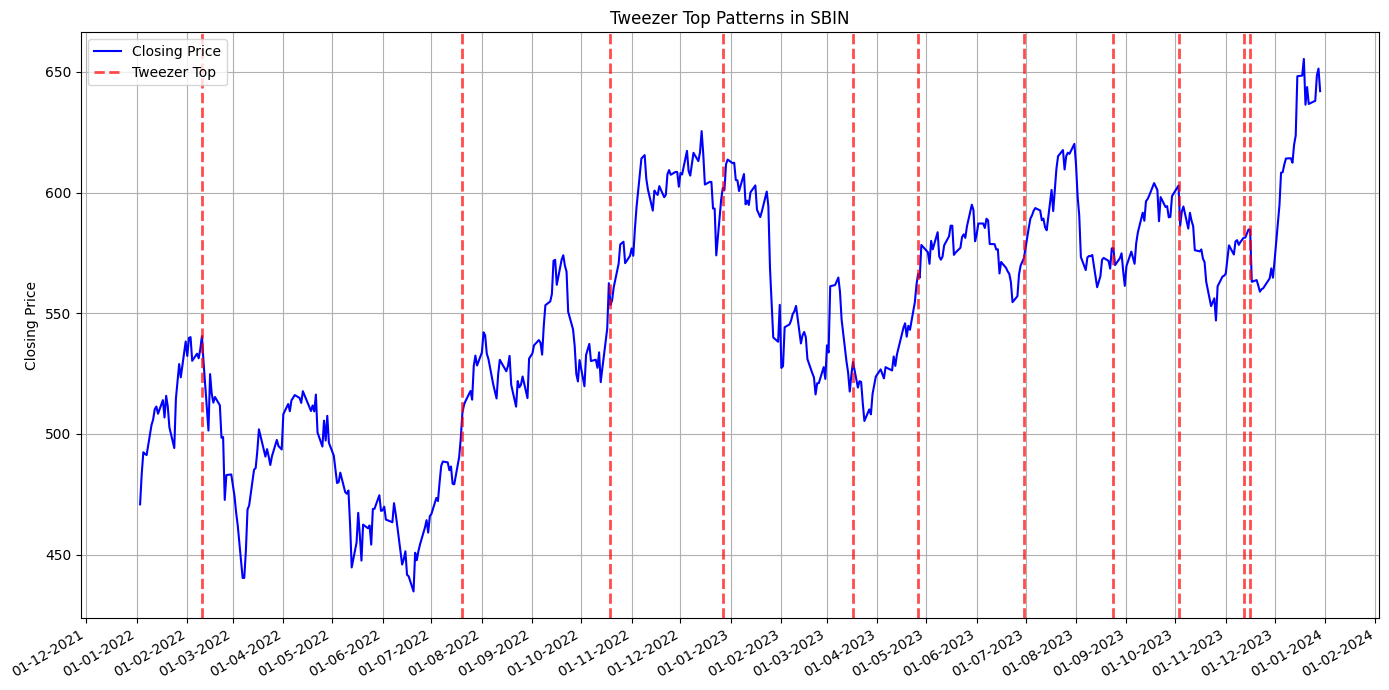

{'data': [{'_id': '63ce898eeb800e0007023eeb', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 64.7, 'CH_TRADE_LOW_PRICE': 63.15, 'CH_OPENING_PRICE': 64.25, 'CH_CLOSING_PRICE': 63.45, 'CH_LAST_TRADED_PRICE': 63.45, 'CH_PREVIOUS_CLS_PRICE': 63.9, 'CH_TOT_TRADED_QTY': 290726, 'CH_TOT_TRADED_VAL': 18574991.8, 'CH_52WEEK_HIGH_PRICE': 85.5, 'CH_52WEEK_LOW_PRICE': 41.75, 'CH_TOTAL_TRADES': 2568, 'CH_ISIN': 'INE332A01027', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:14.396Z', 'updatedAt': '2023-01-23T13:20:14.396Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 63.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce897ff1500d00079a0f92', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 65.3, 'CH_TRADE_LOW_PRICE': 63.45, 'CH_OPENING_PRICE': 64.1, 'CH_CLOSING_PRICE': 63.9, 'CH_LAST_TRADED_PRICE': 63.65, 'CH_PREVIOUS_CLS_PRICE': 63.7, 'CH_TOT_TRADED_QTY': 331903, 

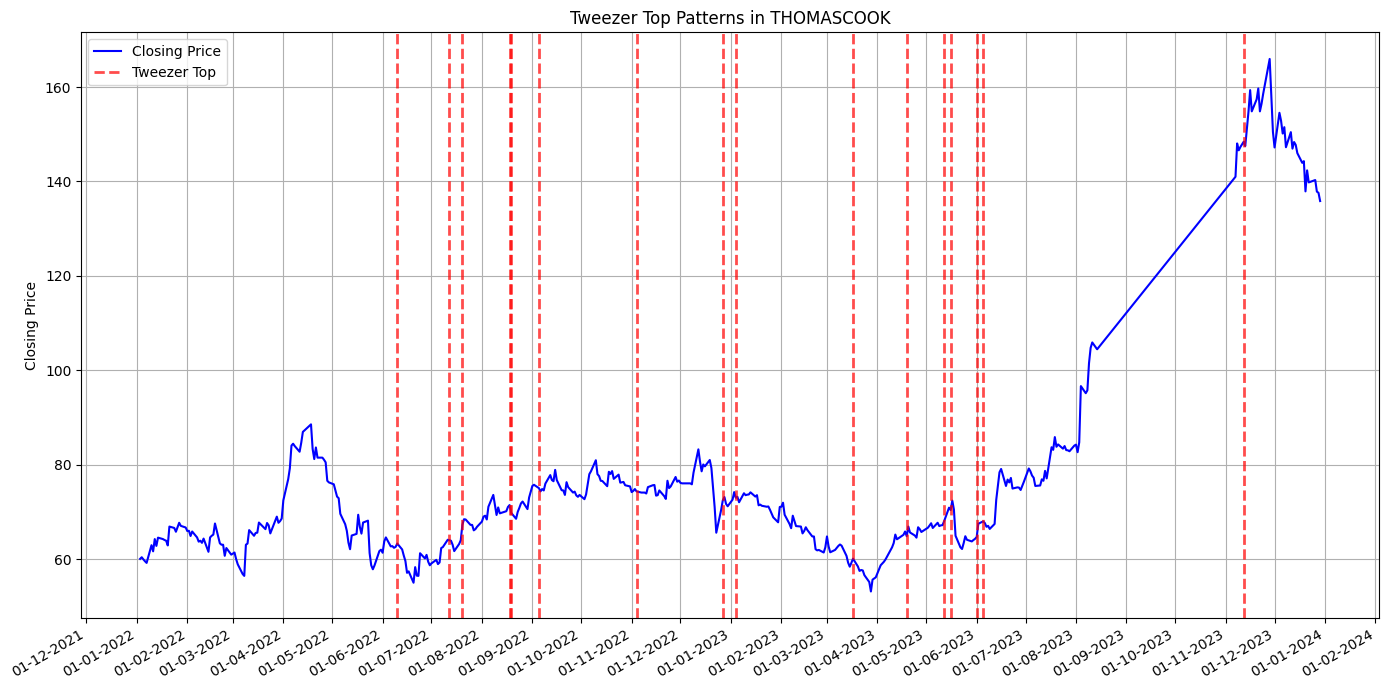

{'data': [{'_id': '63ce898feb800e00070245d3', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 129.1, 'CH_TRADE_LOW_PRICE': 106.1, 'CH_OPENING_PRICE': 108.15, 'CH_CLOSING_PRICE': 122.75, 'CH_LAST_TRADED_PRICE': 122.9, 'CH_PREVIOUS_CLS_PRICE': 107.6, 'CH_TOT_TRADED_QTY': 118621529, 'CH_TOT_TRADED_VAL': 14576896875.85, 'CH_52WEEK_HIGH_PRICE': 166.9, 'CH_52WEEK_LOW_PRICE': 52, 'CH_TOTAL_TRADES': 454648, 'CH_ISIN': 'INE814H01011', 'CH_TIMESTAMP': '2022-02-10', 'TIMESTAMP': '2022-02-09T18:30:00.000Z', 'createdAt': '2023-01-23T13:20:15.905Z', 'updatedAt': '2023-01-23T13:20:15.905Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 122.89, 'mTIMESTAMP': '10-Feb-2022'}, {'_id': '63ce8980f1500d00079a16b8', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 109.85, 'CH_TRADE_LOW_PRICE': 106.5, 'CH_OPENING_PRICE': 109.2, 'CH_CLOSING_PRICE': 107.6, 'CH_LAST_TRADED_PRICE': 107.5, 'CH_PREVIOUS_CLS_PRICE': 108.15, 'CH_TOT_TRA

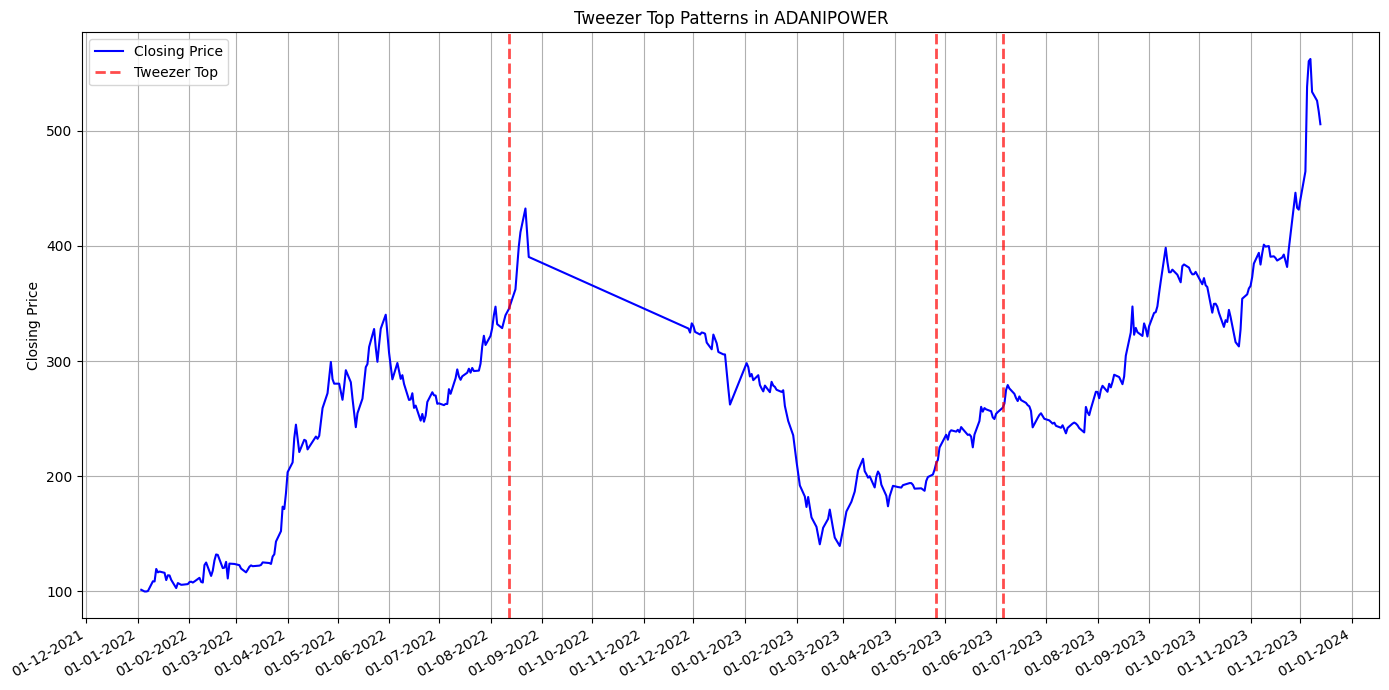

Results saved to Tweezer_Top_Patterns_Dates.xlsx and Tweezer_Top_Patterns.pdf


In [ ]:
#8. Tweezer TOP
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Define function to identify tweezer top patterns
def identify_tweezer_top(stock_df):
    tweezer_top_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for an uptrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 1] > stock_df['CH_CLOSING_PRICE'].iloc[i - 2] and
            stock_df['CH_CLOSING_PRICE'].iloc[i] > stock_df['CH_CLOSING_PRICE'].iloc[i - 1]):

            # Check for Tweezer Top pattern
            high_price_d = stock_df['CH_TRADE_HIGH_PRICE'].iloc[i]
            high_price_d1 = stock_df['CH_TRADE_HIGH_PRICE'].iloc[i + 1]

            if abs(high_price_d1 - high_price_d) <= 0.1:
                tweezer_top_dates.append(stock_df['mTIMESTAMP'].iloc[i + 1])
    return tweezer_top_dates

# Main function to process the Excel file
def main():
    excel_file = input("Enter the Excel file path with stock symbols: ")
    stock_data = pd.read_excel(excel_file)
    stock_symbols = stock_data['Name'].tolist()

    start_date = input("Enter start date (dd-mm-yyyy): ")
    end_date = input("Enter end date (dd-mm-yyyy): ")

    pdf_filename = "Tweezer_Top_Patterns.pdf"
    pdf = PdfPages(pdf_filename)

    with pd.ExcelWriter('Tweezer_Top_Patterns_Dates.xlsx') as writer:
        results = []

        for symbol in stock_symbols:
            try:
                # Fetch equity history for the selected symbol
                equity_data = nse.equity_history(symbol, 'EQ', start_date, end_date)
                stock_df = pd.DataFrame(equity_data)
                stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
                stock_df = stock_df.sort_values(by='mTIMESTAMP')

                # Convert necessary columns to numeric
                stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
                stock_df['CH_TRADE_HIGH_PRICE'] = pd.to_numeric(stock_df['CH_TRADE_HIGH_PRICE'], errors='coerce')

                # Drop rows with NaN values in key columns after conversion
                stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_TRADE_HIGH_PRICE'])

                # Identify tweezer top patterns
                tweezer_top_dates = identify_tweezer_top(stock_df)

                if tweezer_top_dates:
                    # Print identified tweezer top pattern dates
                    print(f"Tweezer Top Pattern Dates for {symbol}:")
                    for date in tweezer_top_dates:
                        print(f"{symbol}: {date}")

                    # Save the dates to results
                    results.append(pd.DataFrame({
                        'Symbol': symbol,
                        'Tweezer Top Dates': pd.Series(tweezer_top_dates)
                    }))

                    # Plotting
                    fig, ax = plt.subplots(figsize=(14, 7))

                    # Plot Closing Price
                    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
                    ax.set_ylabel('Closing Price')
                    ax.set_title(f'Tweezer Top Patterns in {symbol}')
                    ax.grid()
                    # Formatting the dates
                    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
                    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                    plt.gcf().autofmt_xdate()

                    # Highlight Tweezer Top pattern dates
                    for date in tweezer_top_dates:
                        ax.axvline(date, color='red', linestyle='--', lw=2, alpha=0.7, label='Tweezer Top' if date == tweezer_top_dates[0] else "")

                    # Add legends
                    ax.legend(loc='upper left')

                    plt.tight_layout()
                    plt.show()
                    pdf.savefig(fig)
                    plt.close()

                else:
                    print(f"No tweezer top patterns found for {symbol}")

            except Exception as e:
                print(f"Error processing symbol {symbol}: {e}")

        # Save the results to Excel
        if results:
            final_results = pd.concat(results)
            final_results.to_excel(writer, sheet_name='Tweezer Top Dates', index=False)
        else:
            # Ensure at least one sheet is visible if no results found
            pd.DataFrame({'No Data': []}).to_excel(writer, sheet_name='No Data')

    pdf.close()
    print(f'Results saved to Tweezer_Top_Patterns_Dates.xlsx and {pdf_filename}')

if __name__ == "__main__":
    main()


In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.0 MB/s eta 0:00:00


Enter the Excel file path with stock symbols: /content/Stocks.xlsx
Enter start date for SBIN (dd-mm-yyyy): 01-01-2022
Enter end date for SBIN (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63aade60877f910007943796', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 603.1, 'CH_TRADE_LOW_PRICE': 593.3, 'CH_OPENING_PRICE': 600.4, 'CH_CLOSING_PRICE': 601.9, 'CH_LAST_TRADED_PRICE': 602, 'CH_PREVIOUS_CLS_PRICE': 597.1, 'CH_TOT_TRADED_QTY': 9638618, 'CH_TOT_TRADED_VAL': 5765912745.95, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 206219, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2022-12-27', 'TIMESTAMP': '2022-12-26T18:30:00.000Z', 'createdAt': '2022-12-27T12:00:32.695Z', 'updatedAt': '2022-12-27T12:00:32.695Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 598.21, 'mTIMESTAMP': '27-Dec-2022'}, {'_id': '63a98cffdec2580006f62955', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 601.7, 'CH_TRADE

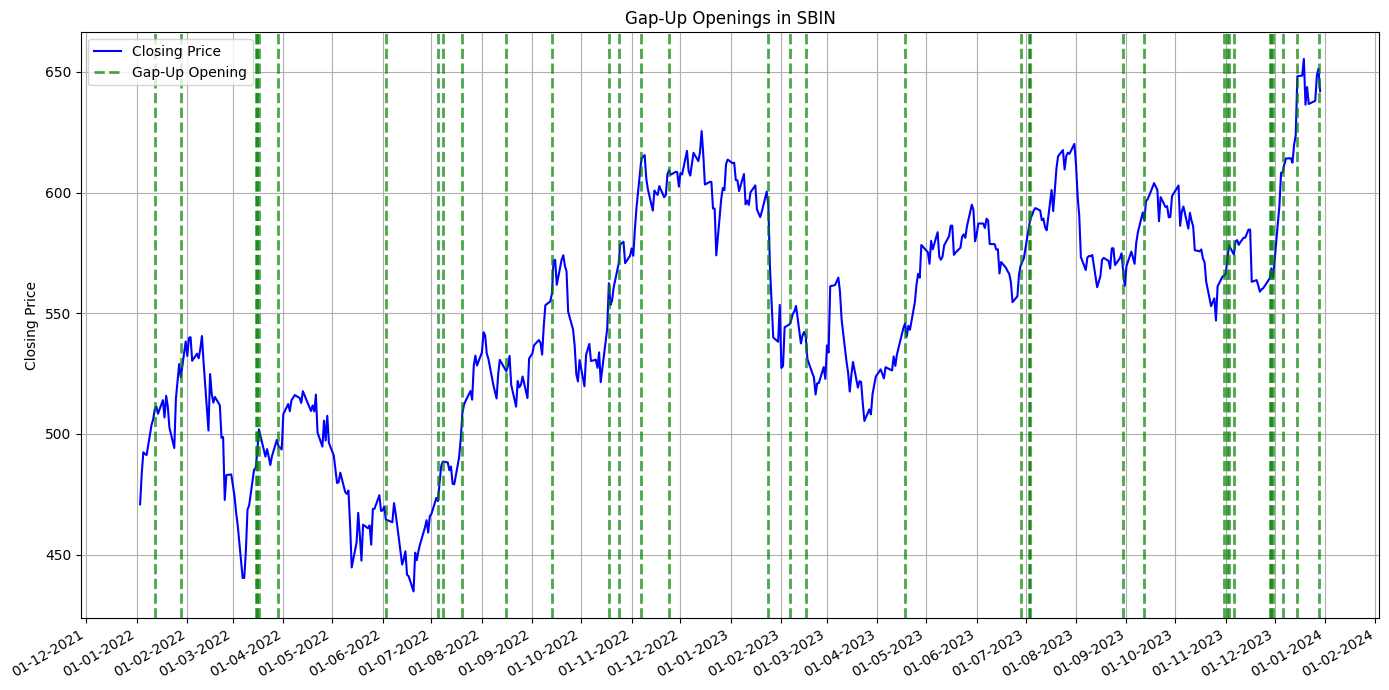

Enter start date for THOMASCOOK (dd-mm-yyyy): 01-01-2022
Enter end date for THOMASCOOK (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce8b17262b0c000763c39f', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 68.9, 'CH_TRADE_LOW_PRICE': 64.8, 'CH_OPENING_PRICE': 65.25, 'CH_CLOSING_PRICE': 67.65, 'CH_LAST_TRADED_PRICE': 68.05, 'CH_PREVIOUS_CLS_PRICE': 66.35, 'CH_TOT_TRADED_QTY': 552479, 'CH_TOT_TRADED_VAL': 36785255.5, 'CH_52WEEK_HIGH_PRICE': 85.5, 'CH_52WEEK_LOW_PRICE': 41.75, 'CH_TOTAL_TRADES': 3674, 'CH_ISIN': 'INE332A01027', 'CH_TIMESTAMP': '2022-03-22', 'TIMESTAMP': '2022-03-21T18:30:00.000Z', 'createdAt': '2023-01-23T13:26:47.372Z', 'updatedAt': '2023-01-23T13:26:47.372Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 66.58, 'mTIMESTAMP': '22-Mar-2022'}, {'_id': '63ce8b08ed0f3900079ba917', 'CH_SYMBOL': 'THOMASCOOK', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 68.95, 'CH_TRADE_LOW_PRICE': 66.1, 'CH_OPENING_PRICE': 68, 'CH_CLO

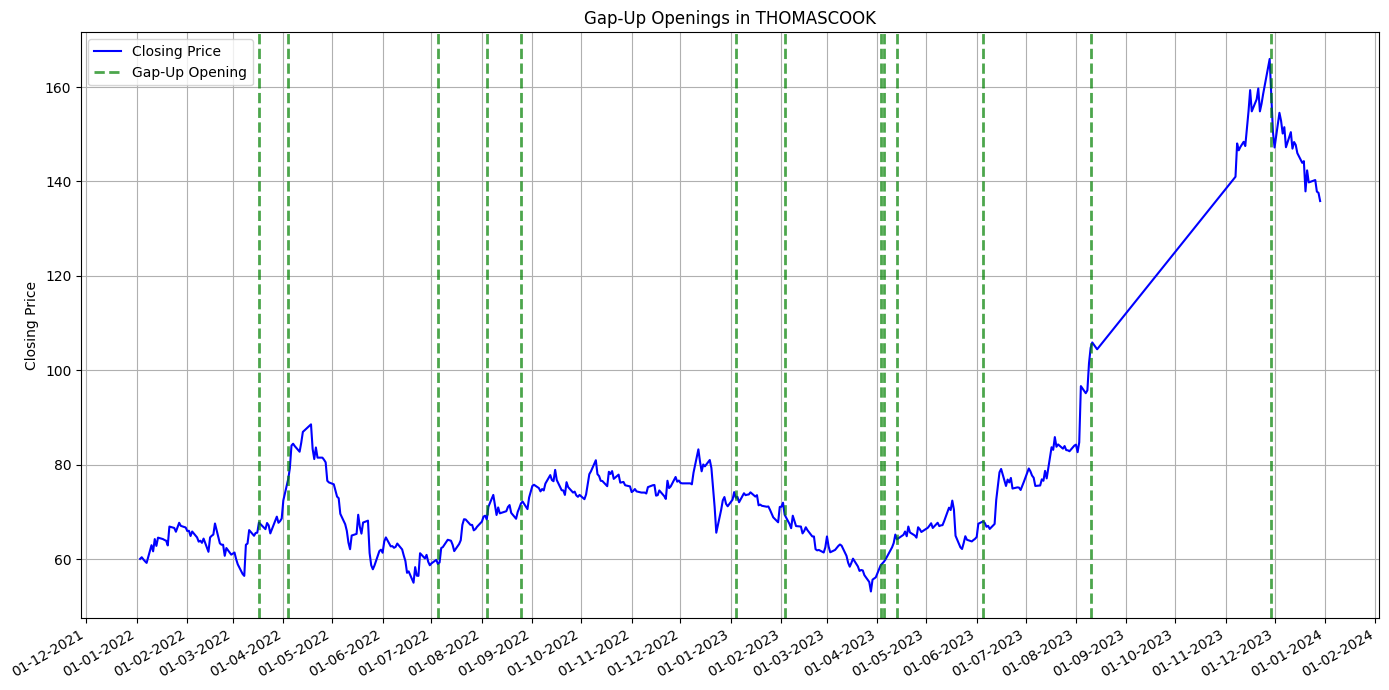

Enter start date for ADANIPOWER (dd-mm-yyyy): 01-01-2022
Enter end date for ADANIPOWER (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63ce8b19262b0c000763cade', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 124.75, 'CH_TRADE_LOW_PRICE': 122.3, 'CH_OPENING_PRICE': 124.5, 'CH_CLOSING_PRICE': 123.75, 'CH_LAST_TRADED_PRICE': 123.65, 'CH_PREVIOUS_CLS_PRICE': 124.55, 'CH_TOT_TRADED_QTY': 11802958, 'CH_TOT_TRADED_VAL': 1455978498.1, 'CH_52WEEK_HIGH_PRICE': 166.9, 'CH_52WEEK_LOW_PRICE': 81.35, 'CH_TOTAL_TRADES': 45126, 'CH_ISIN': 'INE814H01011', 'CH_TIMESTAMP': '2022-03-22', 'TIMESTAMP': '2022-03-21T18:30:00.000Z', 'createdAt': '2023-01-23T13:26:49.127Z', 'updatedAt': '2023-01-23T13:26:49.127Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 123.36, 'mTIMESTAMP': '22-Mar-2022'}, {'_id': '63ce8b09ed0f3900079bb070', 'CH_SYMBOL': 'ADANIPOWER', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 126.9, 'CH_TRADE_LOW_PRICE': 124.1, 'CH_OPENING_PRICE

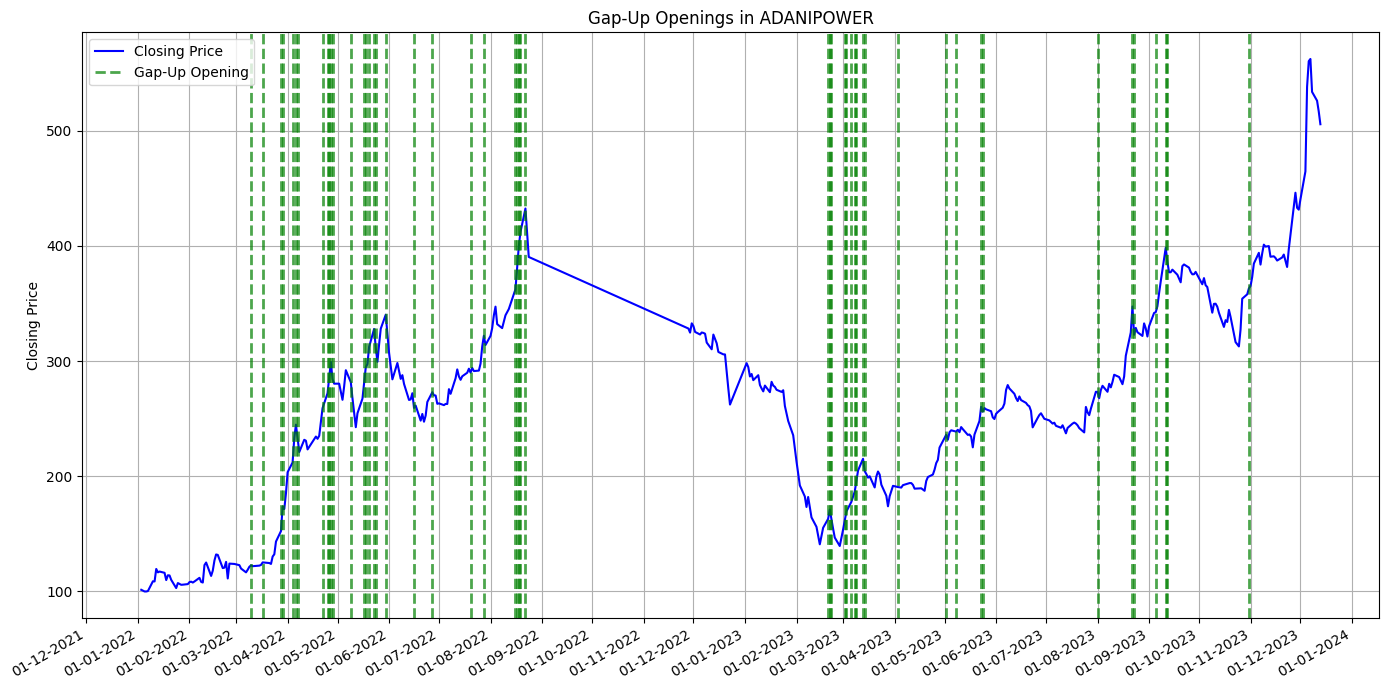

AttributeError: 'XlsxWriter' object has no attribute 'save'

In [ ]:
#9. Gap up openings
import pandas as pd
import nsepython as nse
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Function to fetch equity data
def fetch_equity_data(symbol, series, start_date, end_date):
    equity_data = nse.equity_history(symbol, series, start_date, end_date)
    stock_df = pd.DataFrame(equity_data)
    stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
    stock_df = stock_df.sort_values(by='mTIMESTAMP')
    return stock_df

# Load Excel file with stock symbols
excel_file = input("Enter the Excel file path with stock symbols: ")
stock_data = pd.read_excel(excel_file)

# Create Excel writer for output
excel_writer = pd.ExcelWriter('GapUpOpenings.xlsx', engine='xlsxwriter')

# Create PDF for plots
pdf_pages = PdfPages('GapUpOpeningsPlots.pdf')

# Iterate over each stock symbol
for symbol in stock_data['Name']:
    series = "EQ"
    start_date = input(f"Enter start date for {symbol} (dd-mm-yyyy): ")
    end_date = input(f"Enter end date for {symbol} (dd-mm-yyyy): ")

    # Fetch equity history for the selected symbol
    stock_df = fetch_equity_data(symbol, series, start_date, end_date)

    # Convert necessary columns to numeric
    stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')
    stock_df['CH_TRADE_HIGH_PRICE'] = pd.to_numeric(stock_df['CH_TRADE_HIGH_PRICE'], errors='coerce')
    stock_df['CH_OPENING_PRICE'] = pd.to_numeric(stock_df['CH_OPENING_PRICE'], errors='coerce')

    # Drop rows with NaN values in key columns after conversion
    stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE', 'CH_TRADE_HIGH_PRICE', 'CH_OPENING_PRICE'])

    # Identify Gap-up openings
    gap_up_dates = []
    for i in range(2, len(stock_df) - 1):
        # Check for an uptrend
        if (stock_df['CH_CLOSING_PRICE'].iloc[i - 2] < stock_df['CH_CLOSING_PRICE'].iloc[i - 1] and
            stock_df['CH_CLOSING_PRICE'].iloc[i - 1] < stock_df['CH_CLOSING_PRICE'].iloc[i]):

            # Check for gap-up opening
            high_price_d = stock_df['CH_TRADE_HIGH_PRICE'].iloc[i]
            open_price_d1 = stock_df['CH_OPENING_PRICE'].iloc[i + 1]

            if open_price_d1 > high_price_d:
                gap_up_dates.append((stock_df['mTIMESTAMP'].iloc[i + 1], symbol))  # Add symbol to gap_up_dates

    # Save gap-up opening dates to Excel
    df_gap_up = pd.DataFrame(gap_up_dates, columns=['Date', 'Symbol'])
    df_gap_up.to_excel(excel_writer, sheet_name=symbol, index=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot Closing Price
    ax.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Closing Price', color='blue')
    ax.set_ylabel('Closing Price')
    ax.set_title(f'Gap-Up Openings in {symbol}')
    ax.grid()

    # Formatting the dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()

    # Highlight Gap-Up opening dates
    for date, sym in gap_up_dates:
        if sym == symbol:
            ax.axvline(date, color='green', linestyle='--', lw=2, alpha=0.7,
                       label='Gap-Up Opening' if date == gap_up_dates[0][0] else "")

    # Add legends
    ax.legend(loc='upper left')

    plt.tight_layout()
    plt.show()
    pdf_pages.savefig(fig)  # Save the plot to PDF
    plt.close()

# Close Excel writer and PDF
excel_writer.save()
excel_writer.close()
pdf_pages.close()

print("Gap-Up Opening Dates and Symbols saved in 'GapUpOpenings.xlsx'")
print("Gap-Up Opening Plots saved in 'GapUpOpeningsPlots.pdf'")

